In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DataSets/online_retail.csv",encoding='unicode_escape')

In [ ]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

In [ ]:
(df.isnull().sum()/df.shape[0])*100

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.268311
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,24.926694
Country,0.000000


In [ ]:
df.dropna(subset=["CustomerID"],inplace=True)

In [ ]:
df.shape

(406829, 8)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(401604, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df = df[df['Quantity']>0]

In [ ]:
df["Date"] = pd.to_datetime(df["InvoiceDate"])

In [ ]:
reference_date = max(df["Date"]) + pd.DateOffset(days=1)

In [ ]:
recency = (reference_date - df.groupby('CustomerID')["Date"].max()).dt.days
recency.name = "Recency"
recency.head(2)

,Recency
CustomerID,
12346.0,326
12347.0,2


In [ ]:
freq = df.groupby('CustomerID')['Date'].count()
freq.name = "Freq"
freq.head(2)

,Freq
CustomerID,
12346.0,1
12347.0,182


In [ ]:
df["Total_Price"] = df["Quantity"]*df["UnitPrice"]
monetary = df.groupby('CustomerID')['Total_Price'].sum()
monetary.name = "Monetary"
monetary.head(2)

,Monetary
CustomerID,
12346.0,77183.6
12347.0,4310.0


In [ ]:
recency_df = recency.reset_index()
recency_df.columns = ['CustomerID', 'Recency']

frequency_df = freq.reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']

monetary_df = monetary.reset_index()
monetary_df.columns = ['CustomerID', 'Monetary']

rfm = recency_df.merge(frequency_df, on="CustomerID").merge(monetary_df, on="CustomerID")

In [ ]:
rfm.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24


In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4339 non-null   float64
 1   Recency     4339 non-null   int64  
 2   Frequency   4339 non-null   int64  
 3   Monetary    4339 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 135.7 KB


In [ ]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,92.518322,90.512100,2048.215924
std,1721.889758,100.009747,225.515328,8984.248352
min,12346.000000,1.000000,1.000000,0.000000
25%,13812.500000,18.000000,17.000000,306.455000
50%,15299.000000,51.000000,41.000000,668.560000
75%,16778.500000,142.000000,98.000000,1660.315000
max,18287.000000,374.000000,7676.000000,280206.020000


In [ ]:
rfm['Recency_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['Frequency_Score'] = pd.qcut(rfm['Frequency'], 5, labels=[1, 2, 3, 4, 5])
rfm['Monetary_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [ ]:
rfm['Recency_Score']=rfm['Recency_Score'].astype(int)
rfm['Frequency_Score']=rfm['Frequency_Score'].astype(int)
rfm['Monetary_Score']=rfm['Monetary_Score'].astype(int)

In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       4339 non-null   float64
 1   Recency          4339 non-null   int64  
 2   Frequency        4339 non-null   int64  
 3   Monetary         4339 non-null   float64
 4   Recency_Score    4339 non-null   int64  
 5   Frequency_Score  4339 non-null   int64  
 6   Monetary_Score   4339 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 237.4 KB


In [ ]:
rfm.head(5)

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
0,12346.0,326,1,77183.60,1,1,5
1,12347.0,2,182,4310.00,5,5,5
2,12348.0,75,31,1797.24,2,3,4
3,12349.0,19,73,1757.55,4,4,4
4,12350.0,310,17,334.40,1,2,2


In [ ]:
rfm["log_Recency"]=np.log1p(rfm["Recency"])
rfm["log_Frequency"]=np.log1p(rfm["Frequency"])
rfm["log_Monetary"]=np.log1p(rfm["Monetary"])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
inertia = []
X = rfm[["Recency_Score","Frequency_Score","Monetary_Score"]]
for i in range(2,13):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)

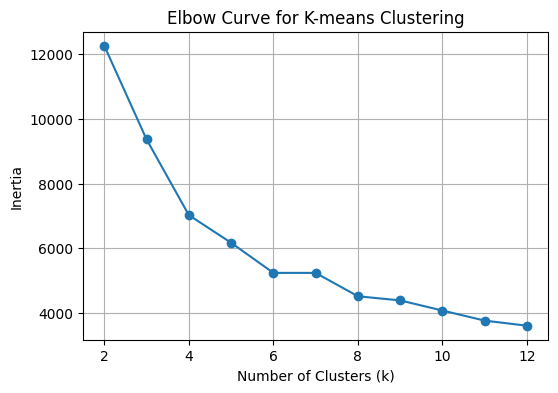

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(range(2, 13), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-means Clustering')
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4,random_state=14)
kmeans.fit(X)
pred = kmeans.predict(X)
rfm["Clusters"] = pred

In [ ]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,log_Recency,log_Frequency,log_Monetary,Clusters
0,12346.0,326,1,77183.60,1,1,5,5.789960,0.693147,11.253955,0
1,12347.0,2,182,4310.00,5,5,5,1.098612,5.209486,8.368925,1
2,12348.0,75,31,1797.24,2,3,4,4.330733,3.465736,7.494564,0
3,12349.0,19,73,1757.55,4,4,4,2.995732,4.304065,7.472245,1
4,12350.0,310,17,334.40,1,2,2,5.739793,2.890372,5.815324,2


In [ ]:
rfm["Clusters"].value_counts()

,count
Clusters,
1,1452
2,1041
0,949
3,897


In [ ]:
clusters = rfm[["Clusters","Recency_Score","Frequency_Score","Monetary_Score"]]
avg_clusters=clusters.groupby("Clusters").mean()

In [ ]:
avg_clusters

,Recency_Score,Frequency_Score,Monetary_Score
Clusters,,,
0,1.959958,3.165437,3.328767
1,4.209366,4.487603,4.442149
2,1.509126,1.400576,1.457253
3,3.948718,2.158305,2.108138


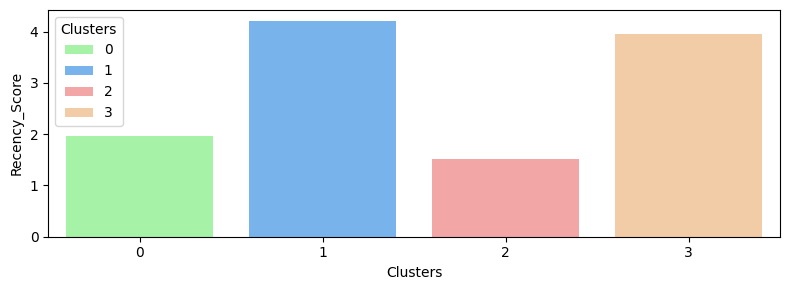

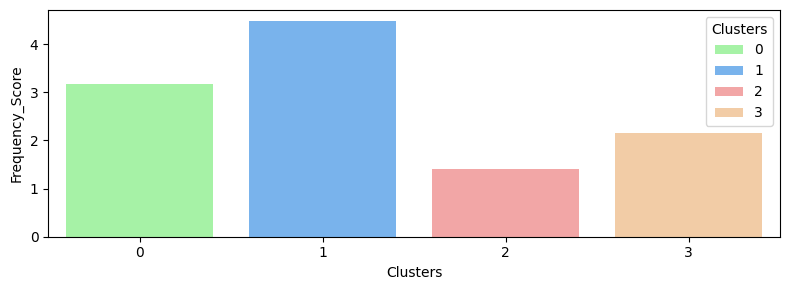

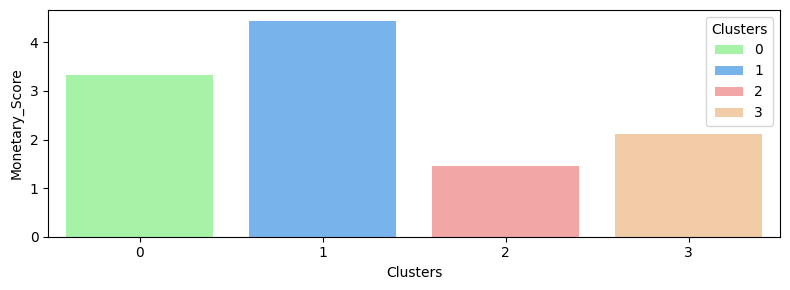

In [ ]:
lst = ["Recency_Score","Frequency_Score","Monetary_Score"]
colors = ['#99ff99', '#66b3ff', '#ff9999', '#ffcc99']
for i in range(3):
  plt.figure(figsize=(8,3))
  sns.barplot(data=avg_clusters,x='Clusters',y=lst[i],hue='Clusters',palette=colors)
  plt.tight_layout()
  plt.show()

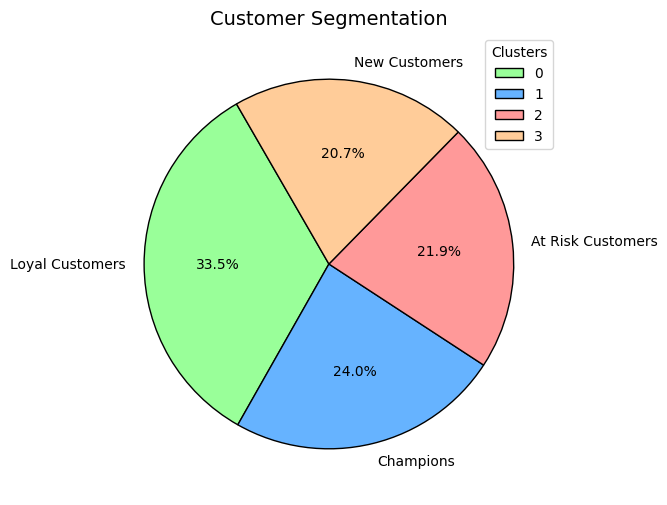

In [ ]:
customers = rfm.shape[0]
labels = ['Loyal Customers','Champions','At Risk Customers','New Customers']
sizes = (rfm["Clusters"].value_counts()/customers)*100
colors = ['#99ff99', '#66b3ff', '#ff9999', '#ffcc99']
plt.figure(figsize=(8, 6))
plt.pie(
    sizes, labels=labels, colors=colors, autopct='%1.1f%%',
    startangle=120, wedgeprops={'edgecolor': 'black'}
)
plt.title('Customer Segmentation', fontsize=14)
plt.legend([0,1,2,3],title='Clusters',loc='best',)
plt.show()

In [ ]:
customer_seg.to_csv("customer_segmentation.csv",index=False)

In [ ]:
import joblib
joblib.dump(kmeans,"customer_segmentation_model.pkl")

['customer_segmentation_model.pkl']

In [ ]:
data = pd.DataFrame(data=[[1,2,3]],columns=["Recency_Score","Frequency_Score","Monetary_Score"])
pred = kmeans.predict(data)
print(pred[0])

numpy.int32

In [ ]:
import plotly.express as px
label = ['Loyal Customers','Champions','At Risk Customers','New Customers']
fig = px.scatter_3d(rfm, x='log_Recency', y='log_Frequency', z='log_Monetary',
              color='Clusters',labels=label)
fig.show()

In [ ]:
rfm.head(2)

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,log_Recency,log_Frequency,log_Monetary,Clusters,Cluster Labels
0,12346.0,326,1,77183.6,1,1,5,5.789960,0.693147,11.253955,0,Loyal Customers
1,12347.0,2,182,4310.0,5,5,5,1.098612,5.209486,8.368925,1,Champions


In [ ]:
df = rfm[['CustomerID','Recency_Score',
       'Frequency_Score', 'Monetary_Score', 'log_Recency', 'log_Frequency',
       'log_Monetary', 'Clusters', 'Cluster Labels']]

In [ ]:
df.to_csv("Customer_Segmentation.csv",index=False)

In [ ]:
rfm.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Recency_Score',
       'Frequency_Score', 'Monetary_Score', 'log_Recency', 'log_Frequency',
       'log_Monetary', 'Clusters', 'Cluster Labels'],
      dtype='object')

In [ ]:
pd.read_csv("/content/Customer_Segmentation.csv").head(2)

,CustomerID,Recency_Score,Frequency_Score,Monetary_Score,log_Recency,log_Frequency,log_Monetary,Clusters,Cluster Labels
0,12346.0,1,1,5,5.789960,0.693147,11.253955,0,Loyal Customers
1,12347.0,5,5,5,1.098612,5.209486,8.368925,1,Champions
